In [64]:
from keras.datasets import imdb

In [65]:
(train_x, train_y), (test_x, test_y) = imdb.load_data(num_words=10000)

In [66]:
# Train x and test x are integers, which are indices into a word dictionary

In [67]:
print("train x shape : ", train_x.shape)
print("train y shape : ", train_y.shape)
print("test x shape : ", test_x.shape)
print("test y shape : ", test_y.shape)

train_x[0]

train_y[0:10]

train x shape :  (25000,)
train y shape :  (25000,)
test x shape :  (25000,)
test y shape :  (25000,)


array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0], dtype=int64)

In [68]:
# Getting a word from index.

# Mapping of word to index.
word_to_index_map = imdb.get_word_index()
# i.e to map integer to word.
index_to_word_map = dict([(value, key) for (key, value) in word_to_index_map.items()])

for i in range(len(test_x[0])):
    print(index_to_word_map[test_x[0][i]])

the
wonder
own
as
by
is
sequence
i
i
and
and
to
of
hollywood
br
of
down
shouting
getting
boring
of
ever
it
sadly
sadly
sadly
i
i
was
then
does
don't
close
faint
after
one
carry
as
by
are
be
favourites
all
family
turn
in
does
as
three
part
in
another
some
to
be
probably
with
world
and
her
an
have
faint
beginning
own
as
is
sequence


In [69]:
# Converting the list of indices into tensors to feed the NN

# Also ensure all lists are first of same dimension / length (10,000 here).
# Also perform one hot encoding, so in the vector of dimension 10,000,
# if the vector originally had 0, 1, 2, 3, then index 0-3 will have 1 and everything else 
# will have zeroes.
import numpy as np

def vectorize(seq):
    # Shape of results is (len(Sequence), 10_000)
    results = np.zeros((len(seq), 10_000))
    for i, s in enumerate(seq):
        results[i, s] = 1
    
    return results

train_x = vectorize(train_x)
test_x = vectorize(test_x)

In [70]:
print(train_x.shape)

train_x

(25000, 10000)


array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [71]:
# Vectorize the y's as well

train_y = np.asarray(train_y).astype('float32')
test_y = np.asarray(test_y).astype('float32')

In [72]:
# Build the model

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10_000, )))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [73]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [74]:
val_x = train_x[:10_000]
partial_train_x = train_x[10_000:]

val_y = train_y[:10_000]
partial_train_y = train_y[10_000:]

In [75]:
history = model.fit(partial_train_x, partial_train_y, epochs=20, batch_size=512, validation_data=(val_x, val_y))

Epoch 1/20
30/30 [==============================] - 5s 138ms/step - loss: 0.5545 - accuracy: 0.7675 - val_loss: 0.4265 - val_accuracy: 0.8600
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3508 - accuracy: 0.8873 - val_loss: 0.3303 - val_accuracy: 0.8810
Epoch 3/20
30/30 [==============================] - 1s 31ms/step - loss: 0.2607 - accuracy: 0.9151 - val_loss: 0.2931 - val_accuracy: 0.8895
Epoch 4/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2073 - accuracy: 0.9329 - val_loss: 0.2904 - val_accuracy: 0.8826
Epoch 5/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1762 - accuracy: 0.9417 - val_loss: 0.2750 - val_accuracy: 0.8883
Epoch 6/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1495 - accuracy: 0.9517 - val_loss: 0.2806 - val_accuracy: 0.8862
Epoch 7/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1279 - accuracy: 0.9601 - val_loss: 0.2947 - val_accuracy: 0.8814
Epoch 8/20
3

In [76]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

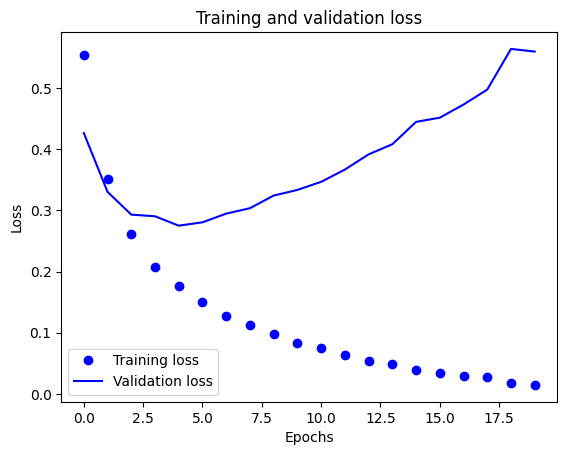

In [77]:
# Visualization of results

import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(20)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

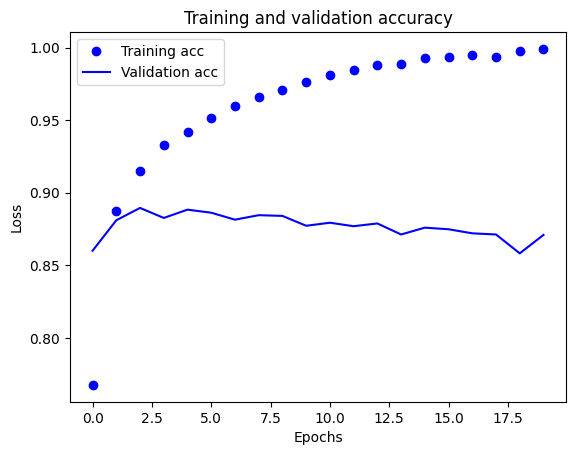

In [79]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()